# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.


# **Problem Statement**
Starbucks provides personalized offers to customers through its rewards program. However, not all offers lead to customer engagement, and understanding which offers are more likely to be completed can improve targeting and campaign effectiveness. The challenge is to predict whether a given offer will be completed based on customer demographics, offer characteristics, and transaction history. This predictive capability can help Starbucks optimize its promotional strategy, enhance customer satisfaction, and increase overall engagement with its reward program.

---

# **Objective**
The goal of this project is to analyze customer engagement with Starbucks' reward program offers and build a machine learning model to predict offer completion. To achieve this, we followed these steps:

1. **Exploratory Data Analysis (EDA)** – We examined the distribution of offers, customer demographics, transaction behaviors, and the effectiveness of different communication channels. This helped in identifying trends and key patterns influencing offer completion.
2. **Feature Engineering** – We created new features and performed feature processing
3. **Machine Learning Model Development** – We built a predictive pipeline using a **Random Forest Classifier**, incorporating data preprocessing, feature transformation, and model training.
4. **Hyperparameter Tuning** – We optimized the model using **GridSearchCV** with 4-fold cross-validation to improve accuracy.
5. **Evaluation and Insights** – We assessed model performance using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and feature importance analysis to determine key factors driving offer completion.



In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration & Cleaning


In this section, we will explore and clean the datasets to ensure they are ready for analysis. Our goal is to understand the structure of the data, identify inconsistencies, and handle missing values.

Objectives:
1. Explore Variable Types – Identify the data types of each column.
2. Check Data Completeness – Detect missing values and assess their impact.
3. Analyze Record Counts – Understand the distribution of data.
4. Clean the Data – Handle missing or incorrect values and ensure consistency.

## 1) Portfolio Dataset

In [2]:
portfolio.shape


(10, 6)

We see that theres 10 different tupes of rewards

In [3]:
portfolio.head()


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


### Distribution of Rewards, Difficulty, and Duration

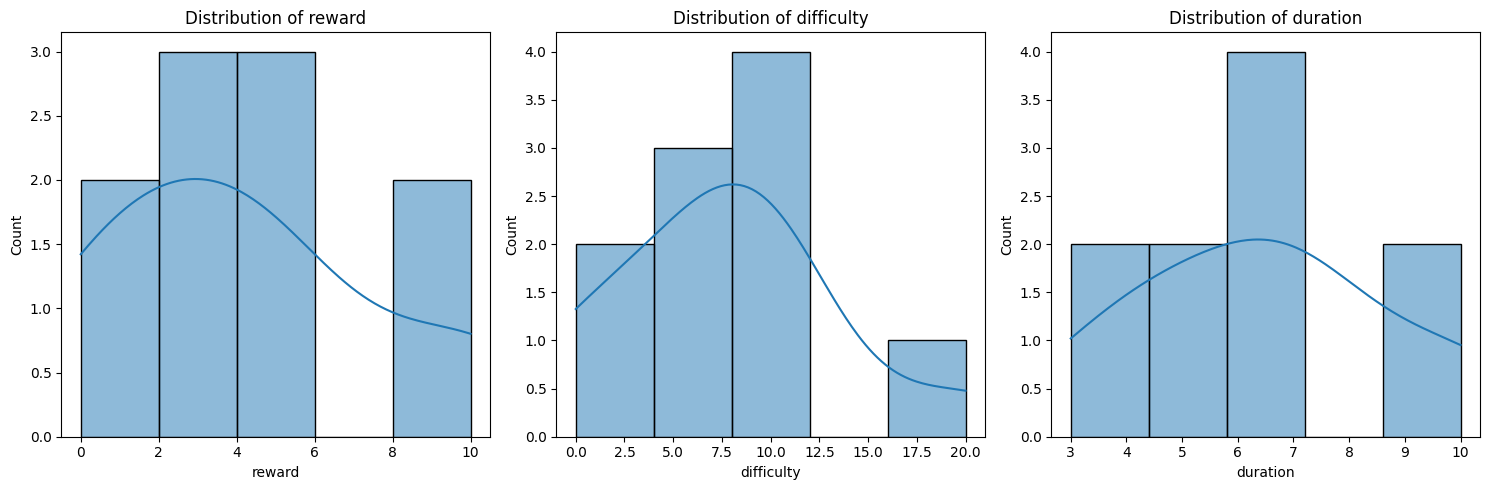

In [4]:
# 1. Visualize Distribution of Rewards, Difficulty, and Duration
plt.figure(figsize=(15, 5))
for i, column in enumerate(['reward', 'difficulty', 'duration'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(portfolio[column], kde=True, bins=5)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

Reward Distribution:
The distribution of rewards shows that values are concentrated between 0 and 10, with no intermediate values. This suggests that rewards follow a fixed-tier system, rather than a continuous scale. The presence of multiple offers with zero rewards indicates that some promotions might be informational rather than incentive-driven.

Difficulty Distribution:
Difficulty levels are right-skewed, meaning most offers have relatively low difficulty, with values ranging from 0 to 10 in most cases. A few offers have a difficulty level of 20, which stands out as an outlier. This indicates that while most promotions are designed to be easily accessible, a few require significant effort to unlock.

Duration Distribution:
The majority of offers last between 3 and 10 days, with a clear peak at 7 days. This suggests that a one-week duration is a common standard for promotional campaigns. The relatively even spread across shorter durations indicates some flexibility in campaign design.

### Distribution of Rewards, Difficulty, and Duration

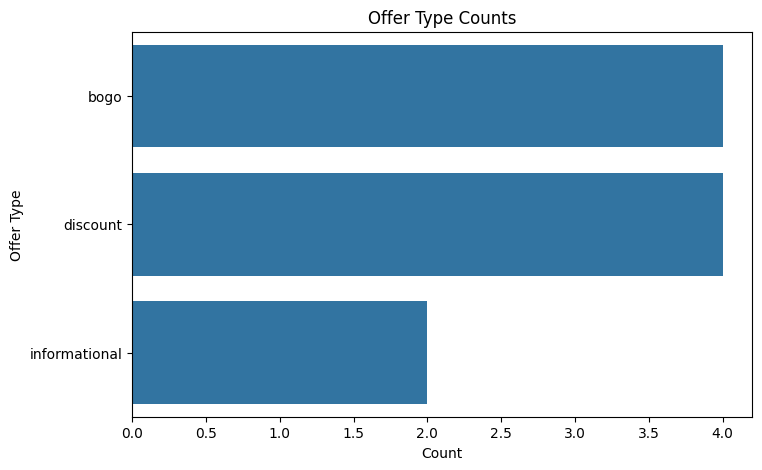

In [5]:
# Offer Type Counts
plt.figure(figsize=(8, 5))
sns.countplot(y=portfolio['offer_type'], order=portfolio['offer_type'].value_counts().index)
plt.title("Offer Type Counts")
plt.xlabel("Count")
plt.ylabel("Offer Type")
plt.show()

The distribution shows BOGO and Discount offers are most common, emphasizing incentive-driven promotions, while Informational offers are fewer, likely used for awareness. This suggests a strategy focused on driving purchases rather than purely informational engagement.

### Null checking

In [6]:
# 3. Check for Null Values
null_values = portfolio.isnull().sum()
print("Null Values in Dataset:\n", null_values)

Null Values in Dataset:
 reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


No Nulls to deal with

### Check Data Types of All Columns

In [7]:
# 4. Check Data Types of All Columns
data_types = portfolio.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object


No Nulls to deal with 

### Count Unique IDs

In [8]:
unique_ids = portfolio['id'].nunique()
print(f"\nUnique IDs: {unique_ids}")



Unique IDs: 10


10 rows and 10 unique IDs, so we are good

### Offer Channel


We will first convert 'channels' column into multiple binary columns

We identify the unique channel types. For each type, we create a new column where:
- 1 indicates the offer includes that channel.
- 0 means it does not.
- Finally, we remove the original "channels" column.

In [9]:
# Convert 'channels' column into multiple binary columns
channel_types = ['web', 'email', 'mobile', 'social']

for channel in channel_types:
    portfolio[channel] = portfolio['channels'].apply(lambda x: 1 if channel in x else 0)

# Drop the original 'channels' column
portfolio.drop(columns=['channels'], inplace=True)

In [10]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,web,email,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


#### Bar Plot - Count of Each Channel Usage


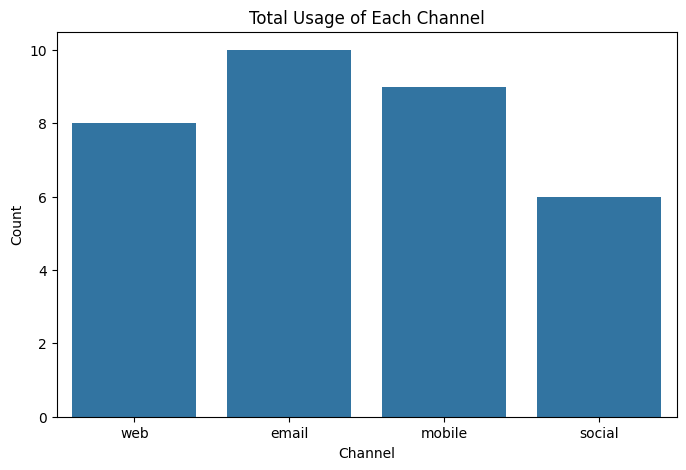

In [11]:
# Bar Plot - Count of Each Channel Usage
plt.figure(figsize=(8, 5))
channel_counts = portfolio[['web', 'email', 'mobile', 'social']].sum()
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title("Total Usage of Each Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

The analysis shows that email is the most frequently used channel, highlighting its importance in customer engagement. Mobile and web channels also have significant usage, suggesting that offers are designed for multi-platform accessibility. In contrast, social media is the least used, indicating that it plays a smaller role in promotions, potentially due to lower effectiveness or a strategic focus on direct communication methods like email and mobile notifications.

#### Stacked Bar Plot - Channel Usage by Offer Type


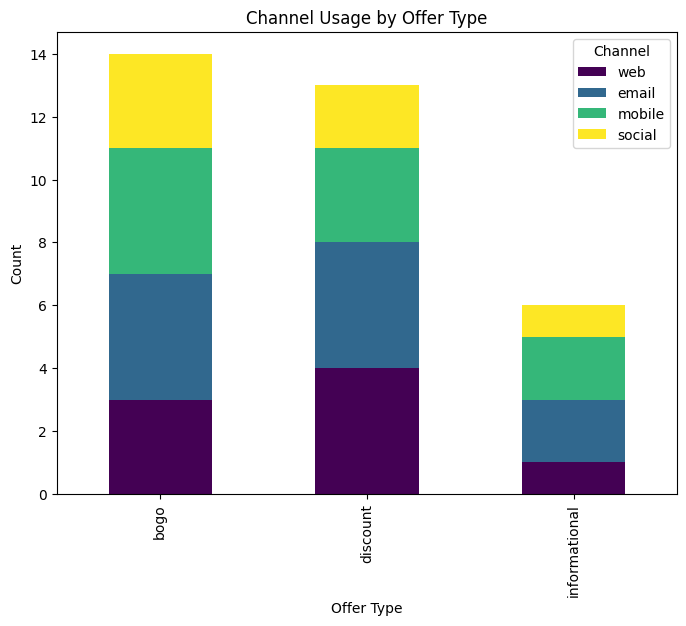

In [12]:
# Stacked Bar Plot - Channel Usage by Offer Type
channel_by_offer = portfolio.groupby('offer_type')[['web', 'email', 'mobile', 'social']].sum()
channel_by_offer.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Channel Usage by Offer Type")
plt.xlabel("Offer Type")
plt.ylabel("Count")
plt.legend(title="Channel")
plt.show()

The Channel Usage by Offer Type chart shows that BOGO and Discount offers utilize all four channels (web, email, mobile, and social) more extensively compared to Informational offers, which have significantly lower usage. Email and mobile are the dominant channels across all offer types, while social media is the least used.

#### Stacked Bar Plot - Channel Usage by Difficulty


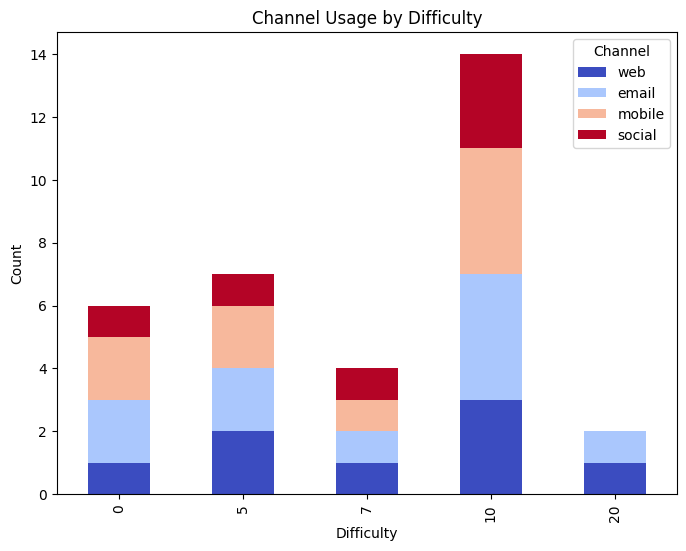

In [13]:
# Stacked Bar Plot - Channel Usage by Difficulty
channel_by_difficulty = portfolio.groupby('difficulty')[['web', 'email', 'mobile', 'social']].sum()
channel_by_difficulty.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.title("Channel Usage by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Count")
plt.legend(title="Channel")
plt.show()

The Channel Usage by Difficulty chart shows that offers with difficulty level 10 have the highest channel engagement, indicating that moderately challenging offers attract more promotions across web, email, mobile, and social. Lower difficulty levels (0, 5, and 7) also see significant channel usage, suggesting accessibility is a key factor in offer design. However, difficulty level 20 has minimal engagement, implying that highly difficult offers are less common or less promoted.

#### Stacked Bar Plot - Channel Usage by Duration

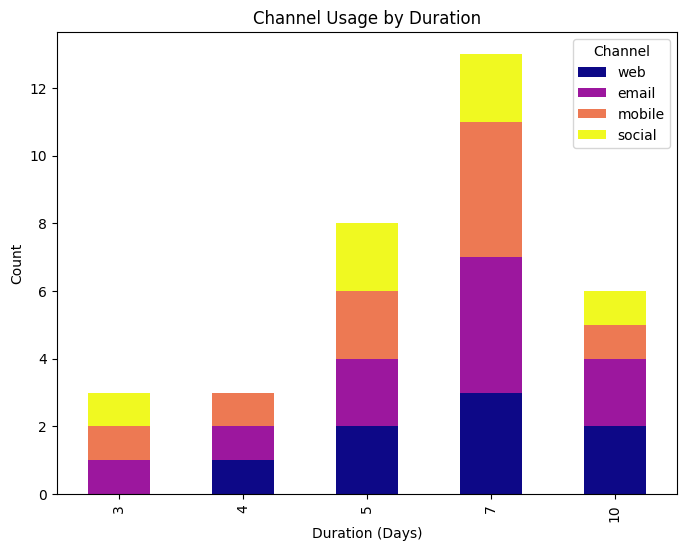

In [14]:
# Stacked Bar Plot - Channel Usage by Duration
channel_by_duration = portfolio.groupby('duration')[['web', 'email', 'mobile', 'social']].sum()
channel_by_duration.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="plasma")
plt.title("Channel Usage by Duration")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")
plt.legend(title="Channel")
plt.show()

The Channel Usage by Duration chart shows that offers lasting 7 days have the highest engagement across all channels, indicating that one-week campaigns are the most popular and widely promoted. Shorter durations (3-5 days) and longer durations (10 days) have lower but still notable channel usage. Email and mobile remain the most utilized channels across all durations, while social media is consistently the least used.

#### Stacked Bar Plot - Channel Usage by Reward

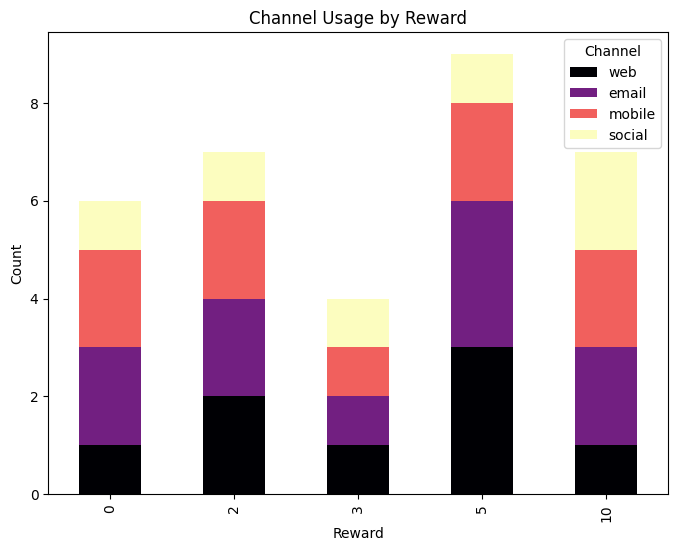

In [15]:
# Stacked Bar Plot - Channel Usage by Reward
channel_by_reward = portfolio.groupby('reward')[['web', 'email', 'mobile', 'social']].sum()
channel_by_reward.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="magma")
plt.title("Channel Usage by Reward")
plt.xlabel("Reward")
plt.ylabel("Count")
plt.legend(title="Channel")
plt.show()

The Channel Usage by Reward chart shows that offers with rewards of 5 and 10 have the highest engagement across all channels, suggesting that moderate to high rewards drive more promotions. Lower reward values (0-3) still receive notable promotion but with slightly lower channel usage. Email and mobile are the dominant channels across all reward levels, while social media is consistently the least used.

## 2) Profile Dataset

In [16]:
profile.head()


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [17]:
profile.shape


(17000, 5)

We can see from the outset that there are null values in this dataset. Addressing them will be our first priority.

In [18]:
# Check for null values in each column of the profile dataset
null_counts_profile = profile.isnull().sum()

# Display columns with null values
print("Null Values in Each Column of Profile Dataset:")
print(null_counts_profile[null_counts_profile > 0])

Null Values in Each Column of Profile Dataset:
gender    2175
income    2175
dtype: int64


From a visual inspection, it appears that all null values in **gender** and **income** correspond to an age of **118**. This could indicate a data recording issue, and since the age is unrealistic and income is missing, these data points may have little value. Below, I'll confirm if this holds true for all cases.

In [19]:
# Count rows where 'gender' is null and 'age' is 118
null_gender_age_118_count = profile[(profile['gender'].isnull()) & (profile['income'].isnull()) & (profile['age'] == 118)].shape[0]
print(null_gender_age_118_count)


2175


This confirms that all null values have an age of 118 and missing income. Therefore, I can safely drop these null rows and proceed with data exploration.

### Drop all null values

In [20]:
# Drop all rows with null values
profile = profile.dropna()

In [21]:
profile.shape

(14825, 5)

In [22]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


### Count the number of unique IDs in the dataset

In [23]:
unique_ids_count = profile['id'].nunique()
unique_ids_count

14825

There are no duplicate IDs, so the data looks clean.

### Convert 'became_member_on' to datetime format


In [24]:
# Convert 'became_member_on' to datetime format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


### Distribution of Age

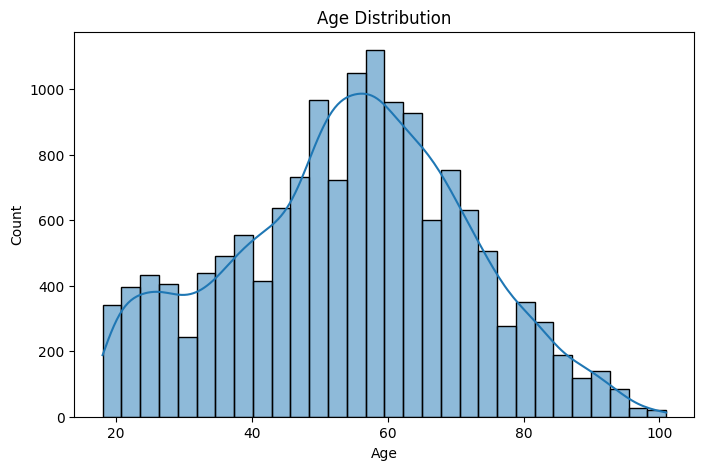

In [25]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(profile['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram shows that the age distribution is roughly bell-shaped, indicating a normal distribution with a slight right skew. Most individuals fall between the 40-70 age range, with a peak around 55-60 years old. 

### Gender Distribution

/tmp/ipykernel_84/3363243796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=profile['gender'], palette="pastel")


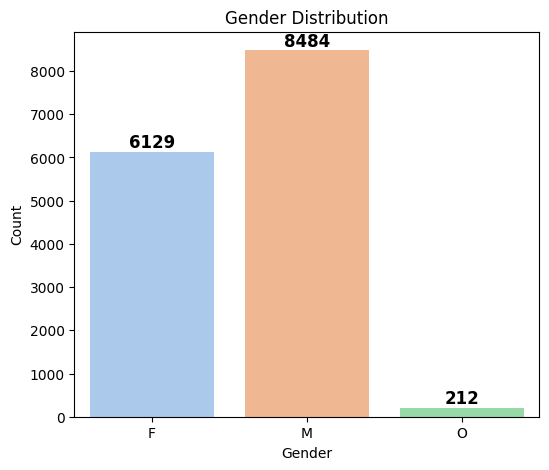

In [26]:
# Create the gender count plot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=profile['gender'], palette="pastel")

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
# Set plot labels and title
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The gender distribution shows that male (M) members are the majority, accounting for 8,484 individuals, followed by female (F) members with 6,129. The "O" category, likely representing non-binary or other gender identities, has a much smaller count of 212. This suggests that the dataset is predominantly composed of male and female customers, with a significantly lower representation of other gender identities.

### Distribution of Income


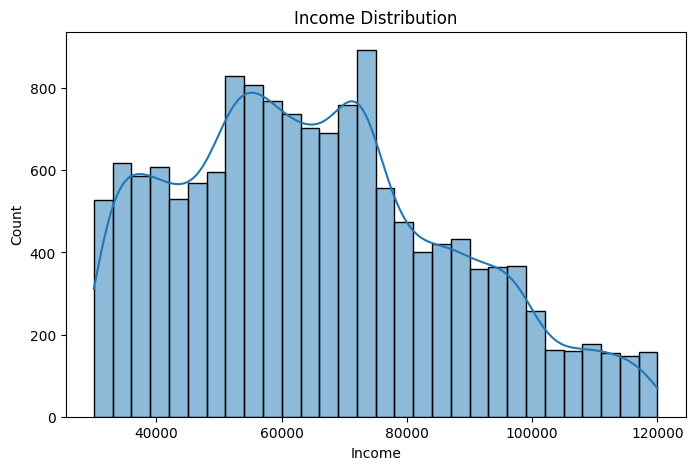

In [27]:
# Distribution of Income
plt.figure(figsize=(8, 5))
sns.histplot(profile['income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

The histogram shows that income is right-skewed, with most individuals earning between $40,000 and $80,000. The peak occurs around $60,000-$70,000, indicating that this is the most common income range in the dataset. The density gradually declines as income increases, with fewer individuals earning above $100,000. This suggests that the dataset primarily consists of middle-income customers, with a smaller proportion of high-income individuals. Understanding this distribution helps in designing targeted promotions based on customer affordability.

### Income by Gender

/tmp/ipykernel_84/3639679330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=profile['gender'], y=profile['income'], palette="pastel")


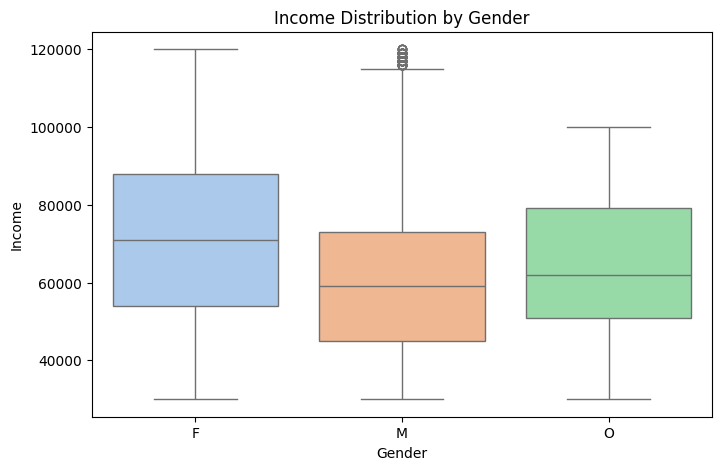

In [28]:
# Boxplot of Income by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=profile['gender'], y=profile['income'], palette="pastel")
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()

The income distribution by gender shows that females (F) have a higher median income compared to males (M) and other (O) categories, with a wider spread of earnings. Males have more high-income outliers, indicating a subset of very high earners. The Other (O) category has a slightly narrower range, likely due to a smaller sample size. 

### Income vs Age colored by Gender

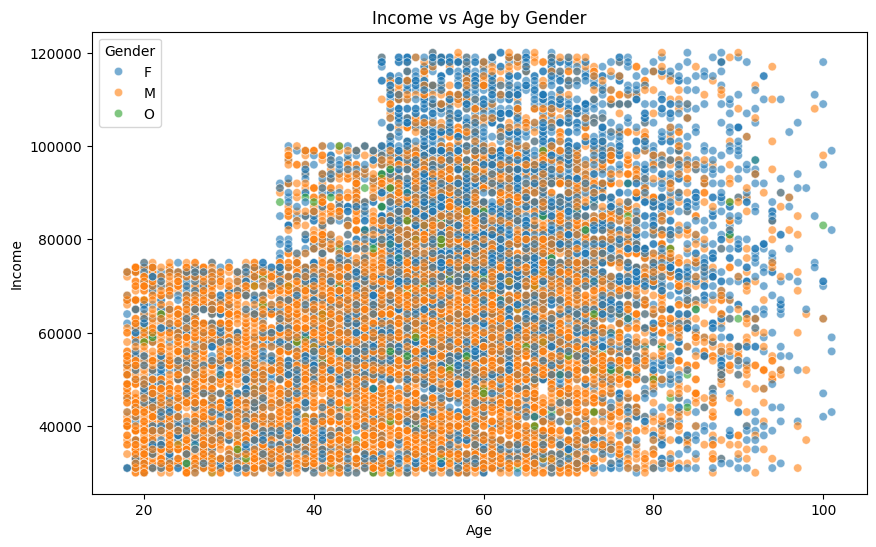

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for Income vs Age colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=profile, x='age', y='income', hue='gender', alpha=0.6)

# Add labels and title
plt.title("Income vs Age by Gender")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Gender")

# Show the plot
plt.show()


The scatter plot shows that income generally increases with age until around 60 years old, after which it stabilizes or slightly declines. Most individuals, regardless of gender, earn between $40,000 and $80,000, with fewer high-income earners above $100,000. The male (M) and female (F) distributions are similar, while the other (O) category has fewer data points but follows the same trend. Overall, age appears to have a stronger influence on income than gender, with middle-aged individuals (40-70) earning the highest salaries. Additionally, we can also observe that males dominate at older ages, suggesting a potential demographic trend in longevity among men.

### Membership Join Date Distribution

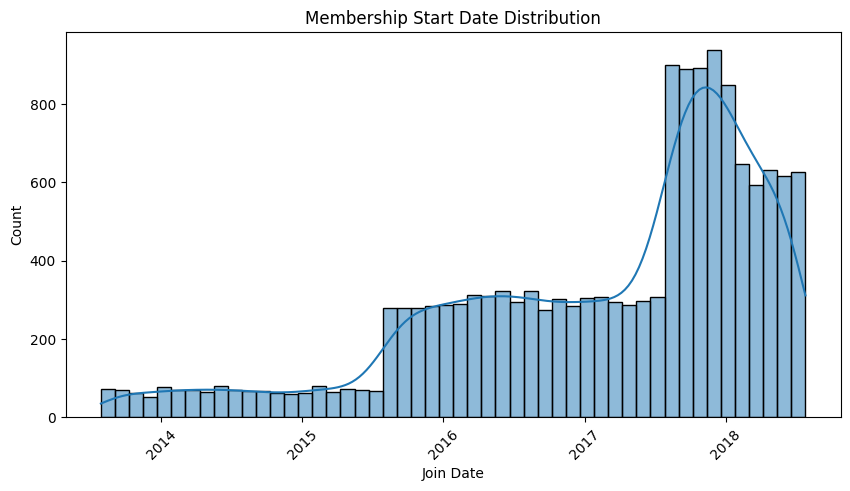

In [30]:
# Membership Join Date Distribution
plt.figure(figsize=(10, 5))
sns.histplot(profile['became_member_on'], bins=50, kde=True)
plt.title("Membership Start Date Distribution")
plt.xlabel("Join Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The membership start date distribution shows a steady increase in new members from 2013 to 2017, followed by a sharp rise in 2017 and early 2018. The peak occurs around mid-2017 to early 2018, indicating a period of high user acquisition. After the peak, membership sign-ups begin to decline slightly. This trend suggests that the business may have launched successful marketing campaigns or promotions during this period, leading to a surge in new members. 

### Membership Join Date vs Income colored by Age

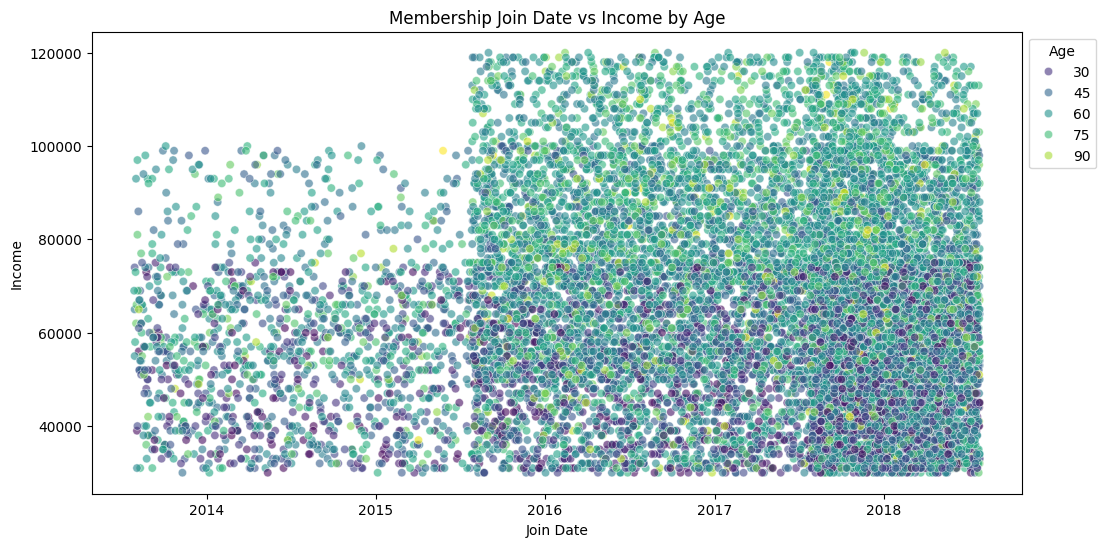

In [31]:
# Create a scatter plot for Membership Join Date vs Income colored by Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=profile, x='became_member_on', y='income', hue='age', palette="viridis", alpha=0.6)

# Add labels and title
plt.title("Membership Join Date vs Income by Age")
plt.xlabel("Join Date")
plt.ylabel("Income")
plt.legend(title="Age", loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()

The plot shows a surge in membership sign-ups from mid 2015 onward, with a high density between 2017 and 2018. Income remains steady across join dates, mostly between $40,000 and $80,000, but older individuals tend to have higher incomes. We also see that from mid-2015, more high earners started joining, indicating a shift in customer demographics.

## 3) Transcript Dataset

In [32]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [33]:
transcript.shape


(306534, 4)

In [34]:
transcript.tail(10)

,person,event,value,time
306524,d613ca9c59dd42f497bdbf6178da54a7,transaction,{'amount': 25.14},714
306525,eec70ab28af74a22a4aeb889c0317944,transaction,{'amount': 43.58},714
306526,24f56b5e1849462093931b164eb803b5,transaction,{'amount': 22.64},714
306527,24f56b5e1849462093931b164eb803b5,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306528,5ca2620962114246ab218fc648eb3934,transaction,{'amount': 2.2},714
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


### Check for null values in all columns


In [35]:
# Check for null values in all columns
null_counts = transcript.isnull().sum()
print(null_counts)

person    0
event     0
value     0
time      0
dtype: int64


### Extract 'offer id', 'offer_id' and 'amount' from the 'value' column and create a new 'id' column


In [36]:
# Extract 'offer id' from the 'value' column and create a new 'id' column
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer_id', x.get('offer id', None)))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount', None))


In [37]:
transcript = transcript.drop(columns = ['value'])

In [38]:
transcript.head()

,person,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [39]:
transcript.tail()

,person,event,time,offer_id,amount
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,None,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,None,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,None,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,None,3.53
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,714,None,4.05


### Plot the distribution of transaction amounts

/tmp/ipykernel_84/3166383371.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['amount_category'] = pd.cut(transactions['amount'], bins=bins, labels=labels, right=False)


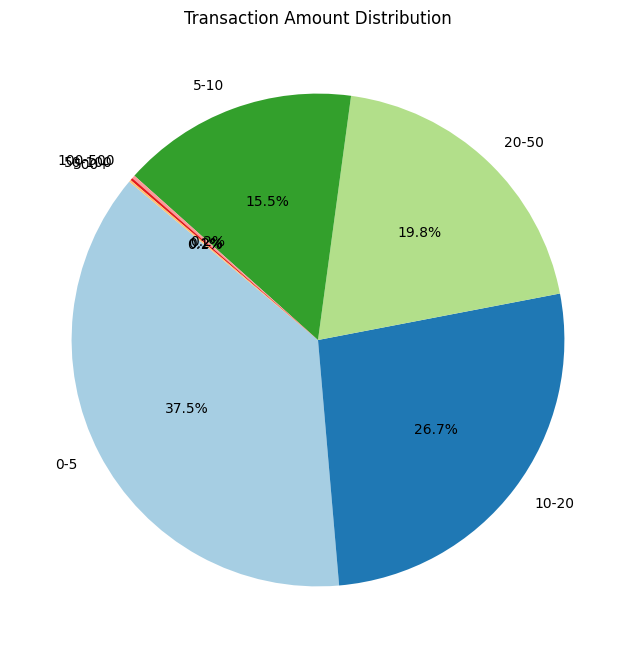

In [40]:
import matplotlib.pyplot as plt

# Filter only transaction events
transactions = transcript[transcript['event'] == 'transaction']

# Categorize transaction amounts into bins
bins = [0, 5, 10, 20, 50, 100, 500, 1000]
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500+']
transactions['amount_category'] = pd.cut(transactions['amount'], bins=bins, labels=labels, right=False)

# Count occurrences in each category
amount_distribution = transactions['amount_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(amount_distribution, labels=amount_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set title
plt.title("Transaction Amount Distribution")

# Show the plot
plt.show()


The pie chart illustrates the distribution of transaction amounts across different price ranges. The largest proportion of transactions (37.5%) falls within the $0-$5 range, indicating that many purchases are small. Transactions in the $10-$20 and $20-$50 ranges account for significant portions at 26.7% and 19.8%, respectively. Meanwhile, the $5-$10 range makes up 15.5% of transactions. Higher-value purchases above $50 are rare, as seen from the very small percentage for amounts beyond this threshold. This suggests that customers primarily make lower-cost transactions.

### Distribution of events


/tmp/ipykernel_84/3358336122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=transcript['event'], order=transcript['event'].value_counts().index, palette="pastel")


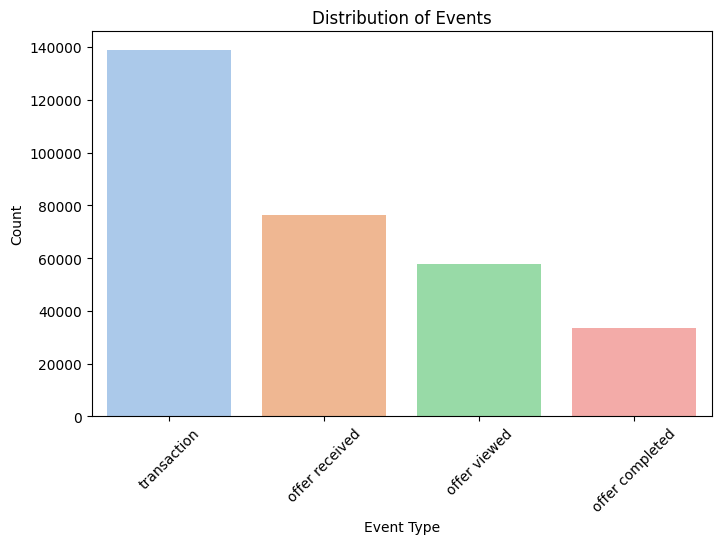

In [41]:
# Distribution of events
plt.figure(figsize=(8, 5))
sns.countplot(x=transcript['event'], order=transcript['event'].value_counts().index, palette="pastel")
plt.title("Distribution of Events")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The distribution of events shows that transactions are the most frequent event, meaning customers make purchases regularly, regardless of offers. Offer received events are the second most common, indicating that many users are being targeted with promotions. However, fewer offers are actually viewed, suggesting that not all recipients engage with them. Offer completed events are the least frequent, meaning only a small portion of users redeem the offers.

### Calculate the average count of each event type 

In [42]:
# Calculate the average count of each event type per person
average_event_per_type = transcript.groupby(['person', 'event']).size().groupby('event').mean()
average_event_per_type

event
offer completed    2.628699
offer received     4.488467
offer viewed       3.429072
transaction        8.381771
dtype: float64

The results show that, on average, each person makes about 8.38 transactions, receives 4.49 offers, views 3.43 offers, and completes 2.63 offers. This suggests that while many offers are sent, fewer are viewed and even fewer are completed. The higher transaction count indicates that customers are making purchases regardless of offer engagement

### Calculate the min and max count of each event type 

#### Min

In [43]:
min_event_per_type = transcript.groupby(['person', 'event']).size().groupby('event').min()
min_event_per_type

event
offer completed    1
offer received     1
offer viewed       1
transaction        1
dtype: int64

#### Max

In [44]:
max_event_per_type = transcript.groupby(['person', 'event']).size().groupby('event').max()
max_event_per_type

event
offer completed     6
offer received      6
offer viewed        6
transaction        36
dtype: int64

The maximum count recorded for offer-related events, including offer received, viewed, and completed, was 6, whereas transactions had a significantly higher maximum of 36, while the minimum count for all event types was 1, indicating that every event type occurred at least once per person.

### Calculate the average time of each event type 

/tmp/ipykernel_84/3019005586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event', y='time', data=transcript, palette='pastel')


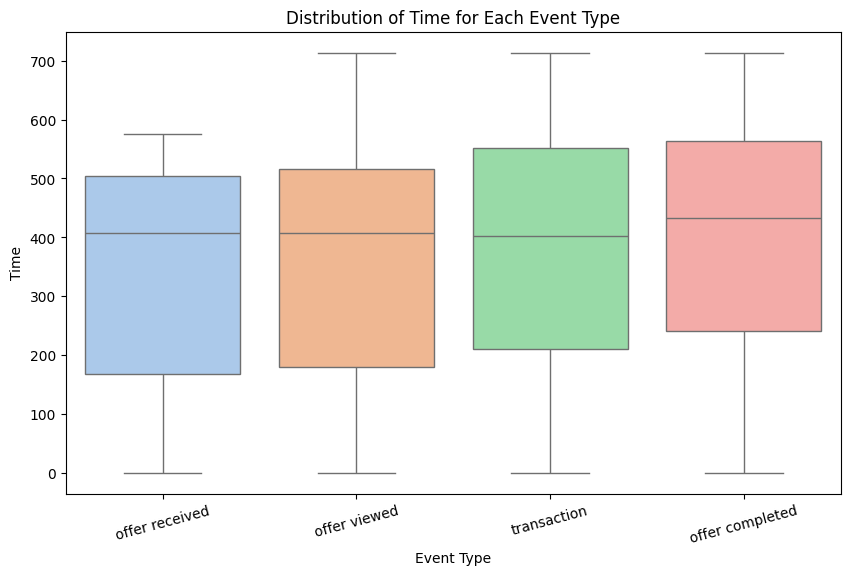

In [45]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='event', y='time', data=transcript, palette='pastel')

# Set title and labels
plt.title('Distribution of Time for Each Event Type')
plt.xlabel('Event Type')
plt.ylabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=15)

# Show the plot
plt.show()

The box plot indicates that the median time for "offer completed" is higher than the other event types, suggesting that users take longer to complete offers after receiving and viewing them. This could be due to the time required for engagement, purchasing decisions, or meeting offer requirements.

# Explanatory Data Analysis (EDA)

Now, we will proceed with exploratory data analysis (EDA) by combining all datasets. Previously, we analyzed each dataset separately, but now we will merge them to gain deeper insights into customer behavior, offer effectiveness, and transaction patterns. This will allow us to explore relationships between demographics, offer interactions, and spending habits.

## Merge Datasets

In [46]:
transcript = transcript.rename(columns = {'id': 'offer_id','person':'person_id'})
profile = profile.rename(columns = {'id':'person_id'})
portfolio = portfolio.rename(columns = {'id':'offer_id'})


Renaming columns across the datasets to ensure consistency and avoid conflicts when merging.

### Merge with profile dataset

In [47]:
transcript = transcript.merge(profile, on='person_id', how = 'inner') 

In [48]:
len(transcript['person_id'].unique())

14825

In [49]:
transcript.head(100)

,person_id,event,time,offer_id,amount,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,2017-05-09,100000.0
...,...,...,...,...,...,...,...,...,...
95,31dda685af34476cad5bc968bdb01c53,transaction,444,None,23.18,F,62,2016-02-11,71000.0
96,31dda685af34476cad5bc968bdb01c53,offer received,504,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,F,62,2016-02-11,71000.0
97,31dda685af34476cad5bc968bdb01c53,transaction,534,None,22.87,F,62,2016-02-11,71000.0
98,31dda685af34476cad5bc968bdb01c53,offer completed,534,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,F,62,2016-02-11,71000.0


We used an inner join when merging the datasets to ensure that only customers and offers that exist in all datasets are retained. This prevents reintroducing any records that were previously dropped due to missing or incorrect data in the age and income columns.

### Merge with portfolio dataset

In [50]:
transcript = transcript.merge(portfolio, on='offer_id', how = 'left') 

In [51]:
transcript.shape

(272762, 17)

In [52]:
transcript.head()

,person_id,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transaction totals by gender and age

/tmp/ipykernel_84/3571236214.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=transcript[transcript['event'] == 'transaction'], x='gender', y='amount', hue='age', ci=None)


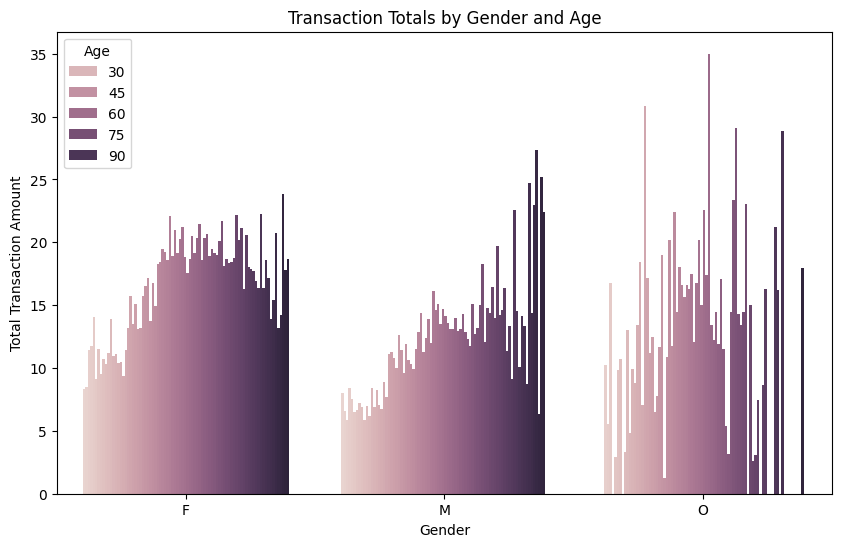

In [53]:
#Transaction totals by gender and age
plt.figure(figsize=(10, 6))
sns.barplot(data=transcript[transcript['event'] == 'transaction'], x='gender', y='amount', hue='age', ci=None)
plt.title("Transaction Totals by Gender and Age")
plt.xlabel("Gender")
plt.ylabel("Total Transaction Amount")
plt.legend(title="Age")
plt.show()


The visualization shows the total transaction amounts categorized by gender and age, with different shades representing various age groups. Older individuals tend to have higher transaction amounts, as indicated by the darker shades, while younger individuals show relatively lower values. Males and females have similar transaction patterns, whereas the "Other" gender category has fewer but more varied transaction amounts. The distribution suggests that older individuals are more likely to engage in higher-value transactions.

##  Offer type by gender, age, and income level

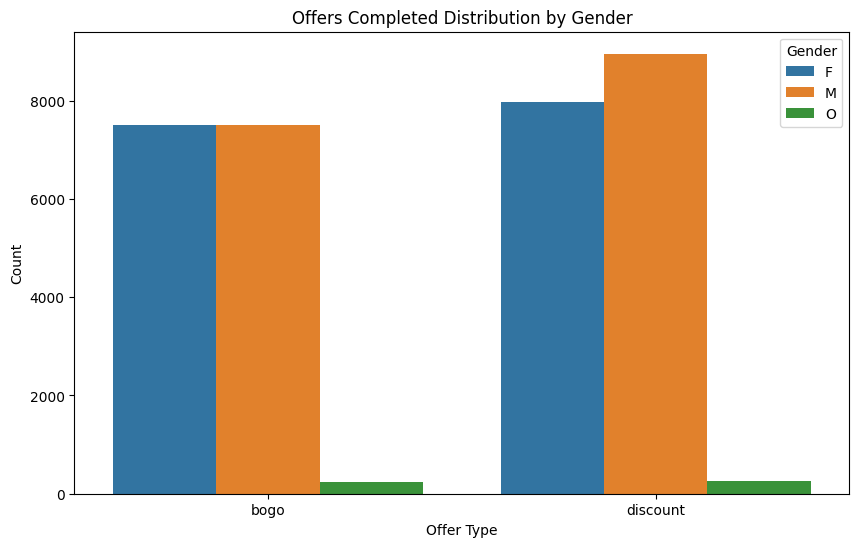

In [54]:
#  Offer type by gender, age, and income level
plt.figure(figsize=(10, 6))
sns.countplot(data=transcript[transcript['event'] == 'offer completed'], x='offer_type', hue='gender')
plt.title("Offers Completed Distribution by Gender")
plt.xlabel("Offer Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

The bar chart shows the distribution of completed offers by gender and offer type. Both bogo and discount offers have similar completion rates among males and females, with discount offers slightly more popular among men. The other gender category has significantly fewer completed offers in both categories. This suggests that bogo and discount** offers are effective across all genders, but men might be slightly more responsive to discount-based promotions.

## Completion Rates

In [55]:
# Create a copy of the transcript DataFrame
transcript_eda = transcript.copy()

# Create age_group and income_bracket columns using pd.cut
transcript_eda['age_group'] = pd.cut(transcript_eda['age'], bins=[0, 25, 40, 60, 100], labels=['<25', '25-40', '40-60', '60+'])
transcript_eda['income_bracket'] = pd.cut(transcript_eda['income'], bins=[0, 40000, 70000, 100000, 150000], labels=['Low', 'Medium', 'High', 'Very High'])

# Separate the event column into binary columns
event_types = ['offer received', 'offer viewed', 'offer completed']
for event in event_types:
    transcript_eda[event.replace(" ", "_")] = (transcript_eda['event'] == event).astype(int)

# Fill NaN values in amount column with 0
transcript_eda['amount'] = transcript_eda['amount'].fillna(0)

# Calculate total_spent, average_transaction_amount, and offer_completion_rate for each person
total_spending = transcript_eda.groupby(['person_id'])['amount'].sum().rename('total_spending')
avg_transaction_amount = transcript_eda.groupby(['person_id'])['amount'].mean().rename('avg_transaction_amount')
offer_complete_rate = (transcript_eda.groupby(['person_id'])['offer_completed'].sum() / transcript_eda.groupby(['person_id'])['offer_received'].sum()).fillna(0).rename('offer_complete_rate')

# Concatenate the calculated metrics into a single DataFrame
customer_metrics = pd.concat([total_spending, avg_transaction_amount, offer_complete_rate], axis=1)

# Merge the customer_metrics DataFrame back into the transcript_eda DataFrame
transcript_eda = transcript_eda.merge(customer_metrics, on='person_id', how='left')

# Group by age_group and income_bracket and calculate the mean of the selected columns
aggregated_metrics = transcript_eda.groupby(['age_group', 'income_bracket'])[['total_spending', 'avg_transaction_amount', 'offer_complete_rate']].mean().reset_index()


/tmp/ipykernel_84/2935306488.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_metrics = transcript_eda.groupby(['age_group', 'income_bracket'])[['total_spending', 'avg_transaction_amount', 'offer_complete_rate']].mean().reset_index()


In [56]:
aggregated_metrics

,age_group,income_bracket,total_spending,avg_transaction_amount,offer_complete_rate
0,<25,Low,83.818633,3.292456,0.404090
1,<25,Medium,110.959487,4.595208,0.474447
2,<25,High,134.905859,5.713894,0.486659
3,<25,Very High,NaN,NaN,NaN
4,25-40,Low,82.277080,3.353971,0.437908
5,25-40,Medium,119.562901,4.864603,0.510144
6,25-40,High,179.794804,7.771634,0.591099
7,25-40,Very High,NaN,NaN,NaN
8,40-60,Low,72.528130,3.039521,0.407826
9,40-60,Medium,120.250614,5.249896,0.537619


Older and wealthier customers complete offers at higher rates and tend to spend more per transaction.
Lower-income customers, regardless of age, have lower transaction amounts and completion rates, indicating they may need more enticing or tailored offers to drive engagement.
Offer completion rates rise with age and income, suggesting that Starbucks' marketing strategy should consider personalized promotions for younger, lower-income customers to boost engagement while maintaining high-value campaigns for high-spending older demographics.

### Which age group and income level are more responsive to which offer types

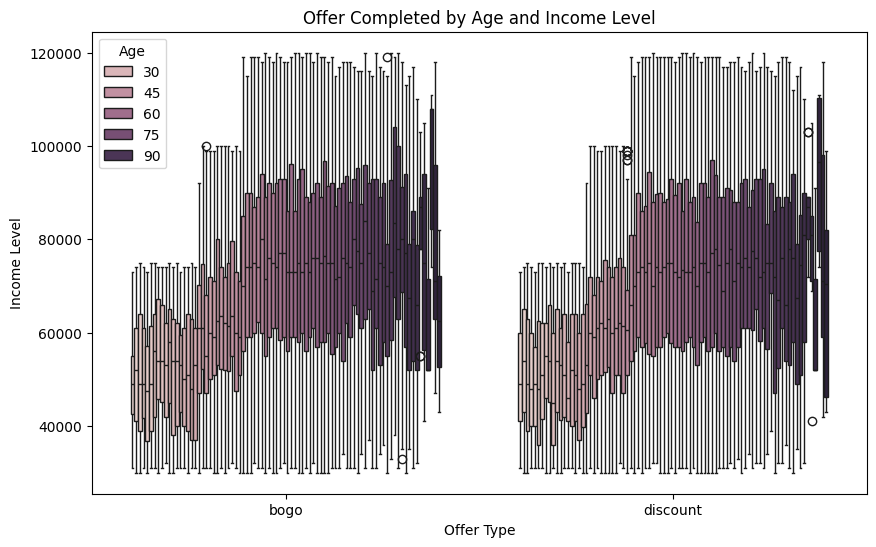

In [57]:
# Which age group and income level are more responsive to which offer types
plt.figure(figsize=(10, 6))
sns.boxplot(data=transcript[transcript['event'] == 'offer completed'], x='offer_type', y='income', hue='age')
plt.title("Offer Completed by Age and Income Level")
plt.xlabel("Offer Type")
plt.ylabel("Income Level")
plt.legend(title="Age")
plt.show()

The plot shows the distribution of completed bogo and discount offers based on income level and age group. Lower-income individuals (below $60,000) tend to complete fewer offers compared to higher-income individuals, who show a higher concentration of completed offers.This suggests that higher-income and middle-aged customers are the most responsive to promotional offers.

### Calculate Average Time to Complete Offers by Gender, Income, and Age (Binned into 10 10 quantile-based categories)


In [58]:
import pandas as pd
import numpy as np

# Define bins for income and age (10 categories each)
completed_offers = transcript[transcript['event'] == 'offer completed']
income_bins = pd.qcut(completed_offers['income'], q=10, labels=[f'Q{i+1}' for i in range(10)])
age_bins = pd.qcut(completed_offers['age'], q=10, labels=[f'Q{i+1}' for i in range(10)])

# Assign bins to the dataset
completed_offers['income_category'] = income_bins
completed_offers['age_category'] = age_bins

# Calculate average time to complete offers by gender
avg_time_gender = completed_offers.groupby('gender')['time'].mean()
print("Average Time to Complete Offers by Gender:")
print(avg_time_gender)

# Calculate average time to complete offers by income category
avg_time_income = completed_offers.groupby('income_category')['time'].mean()
print("\nAverage Time to Complete Offers by Income Category:")
print(avg_time_income)

# Calculate average time to complete offers by age category
avg_time_age = completed_offers.groupby('age_category')['time'].mean()
print("\nAverage Time to Complete Offers by Age Category:")
print(avg_time_age)


Average Time to Complete Offers by Gender:
gender
F    396.899399
M    402.753917
O    380.383234
Name: time, dtype: float64

Average Time to Complete Offers by Income Category:
income_category
Q1     410.056838
Q2     404.839319
Q3     398.225410
Q4     399.459854
Q5     397.949784
Q6     398.828194
Q7     394.621887
Q8     398.649123
Q9     397.015951
Q10    395.874715
Name: time, dtype: float64

Average Time to Complete Offers by Age Category:
age_category
Q1     404.889543
Q2     398.236934
Q3     398.776799
Q4     399.561920
Q5     394.600970
Q6     398.227642
Q7     398.794949
Q8     401.340273
Q9     401.563899
Q10    400.104283
Name: time, dtype: float64


/tmp/ipykernel_84/219453608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_offers['income_category'] = income_bins
/tmp/ipykernel_84/219453608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_offers['age_category'] = age_bins
/tmp/ipykernel_84/219453608.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence

The analysis shows that males take the longest to complete offers (**402.75** hours), followed by females (**396.90** hours), while the "Other" category completes them the fastest (**380.38** hours). Lower-income individuals (**Q1**) take the most time (**410.06** hours), while those in **Q7** are the fastest (**394.62** hours), suggesting higher-income groups act more quickly. For age, younger individuals (**Q1**) take the longest (**404.88** hours), middle-aged users (**Q5**) are the fastest (**394.60** hours), and older individuals (**Q9-Q10**) take slightly longer (~**401-400** hours). Overall, middle-aged and higher-income individuals complete offers the quickest, while younger and lower-income users take more time.

### Preferred Communication Channels by Age and Income for Completed Offers

/tmp/ipykernel_84/281131738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_offers['income_category'] = pd.qcut(completed_offers['income'], q=10, labels=[f'Q{i+1}' for i in range(10)])
/tmp/ipykernel_84/281131738.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_offers['age_category'] = pd.qcut(completed_offers['age'], q=10, labels=[f'Q{i+1}' for i in range(10)])


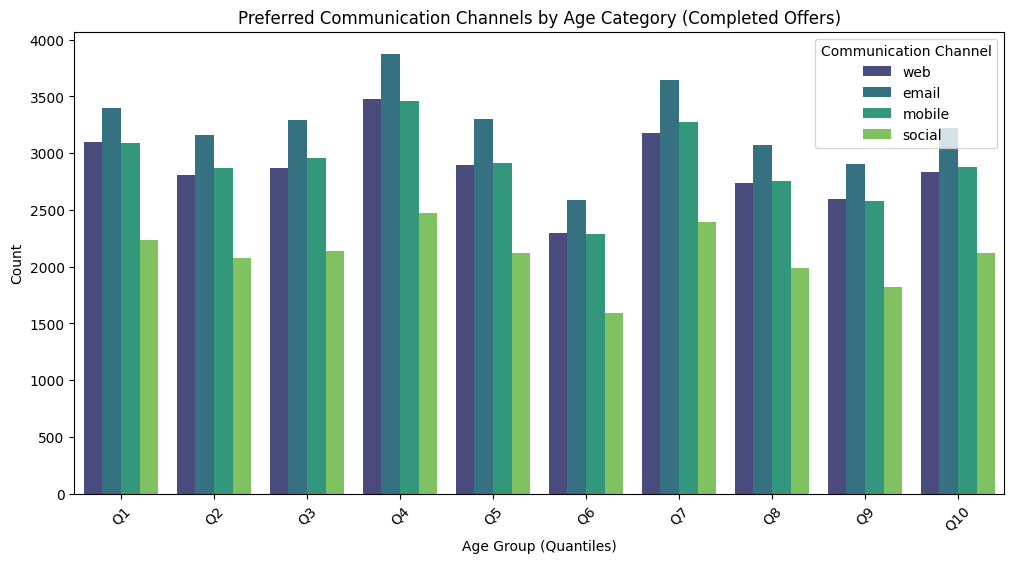

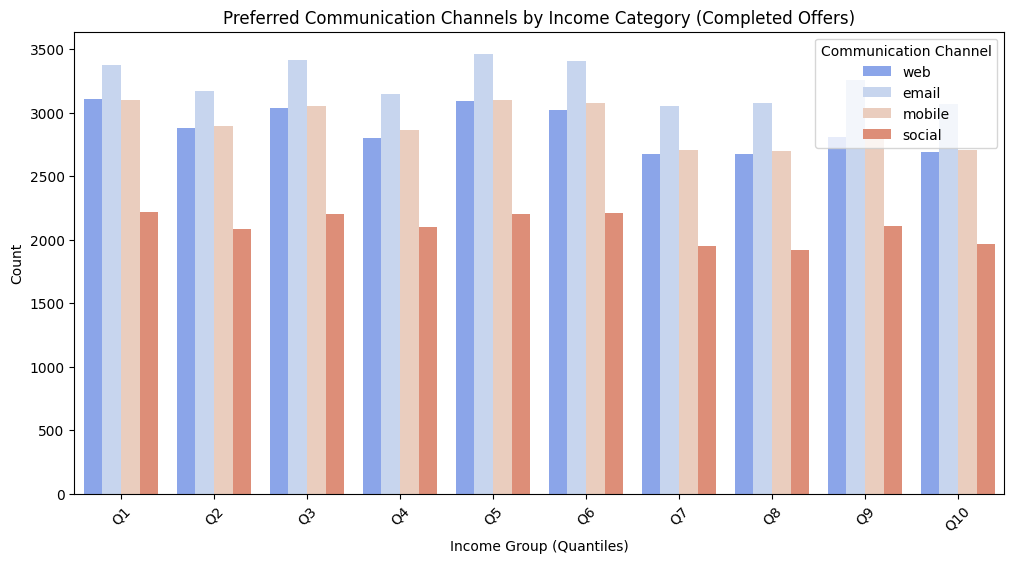

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only completed offers
completed_offers = transcript[transcript['event'] == 'offer completed']

# Define age and income bins
completed_offers['income_category'] = pd.qcut(completed_offers['income'], q=10, labels=[f'Q{i+1}' for i in range(10)])
completed_offers['age_category'] = pd.qcut(completed_offers['age'], q=10, labels=[f'Q{i+1}' for i in range(10)])

# Melt the dataset for visualization
channels = ['web', 'email', 'mobile', 'social']
melted_channels = completed_offers.melt(id_vars=['age_category', 'income_category'], value_vars=channels, var_name='Channel', value_name='Used')
melted_channels = melted_channels[melted_channels['Used'] == 1]  # Keep only used channels

# Plot for age category
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_channels, x='age_category', hue='Channel', palette='viridis')
plt.title("Preferred Communication Channels by Age Category (Completed Offers)")
plt.xlabel("Age Group (Quantiles)")
plt.ylabel("Count")
plt.legend(title="Communication Channel")
plt.xticks(rotation=45)
plt.show()

# Plot for income category
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_channels, x='income_category', hue='Channel', palette='coolwarm')
plt.title("Preferred Communication Channels by Income Category (Completed Offers)")
plt.xlabel("Income Group (Quantiles)")
plt.ylabel("Count")
plt.legend(title="Communication Channel")
plt.xticks(rotation=45)
plt.show()


Both charts show a fairly even distribution of communication channel preferences across different age and income groups. Web and email appear to be the most commonly used channels for completing offers, followed closely by mobile. Social media is the least used but still maintains a presence. The similarity in distribution suggests that communication preferences do not vary significantly by age or income, meaning customers across different demographics tend to engage with offers through the same primary channels.

### Tenure vs. Total Rewards Earned (Colored by Gender)

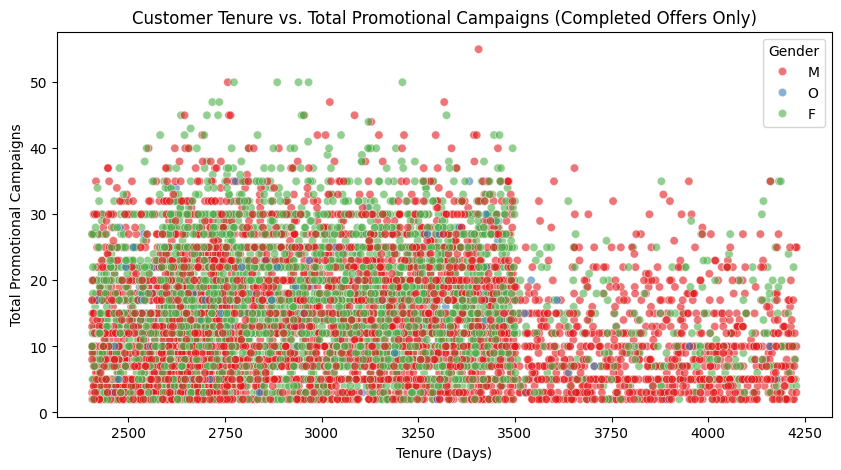

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter only completed offers
completed_offers = transcript[transcript['event'] == 'offer completed'].copy()

# Convert tenure (became_member_on) to number of days since membership started
completed_offers['tenure'] = (pd.to_datetime('today') - pd.to_datetime(completed_offers['became_member_on'])).dt.days

# Aggregate total rewards and transaction amounts per customer, including gender
customer_stats = completed_offers.groupby(['person_id', 'gender']).agg(
    total_rewards=('reward', 'sum'),  # Sum of rewards earned from completed offers
    total_transaction_amount=('amount', 'sum'),  # Total amount spent
    tenure=('tenure', 'mean')  # Average tenure per customer
).reset_index()

# Plot 1: Tenure vs. Total Rewards Earned (Colored by Gender)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=customer_stats, x='tenure', y='total_rewards', hue='gender', alpha=0.6, palette='Set1')
plt.title("Customer Tenure vs. Total Promotional Campaigns (Completed Offers Only)")
plt.xlabel("Tenure (Days)")
plt.ylabel("Total Promotional Campaigns")
plt.legend(title="Gender")
plt.show()



The scatter plot shows the relationship between customer tenure and total completed campaigns , grouped by gender. Longer-tenured customers tend to complete more campaigns, but participation varies widely.

# Modeling

Before modeling, we conducted thorough data exploration on individual datasets, cleaning and merging them to create a unified dataset. This involved handling missing values, renaming columns for consistency, and ensuring only relevant records were retained. 

Once merged, we performed extensive exploratory data analysis (EDA) to understand transaction trends, offer completion rates, communication channel effectiveness, and the impact of demographics like age, gender, and income. This helped us identify patterns in customer behavior, such as which groups respond better to certain offers and communication methods.

Now, we move to modeling, where we aim to predict offer completion. To do this, we classified offers as "completed" or "not completed" based on whether a customer received, viewed, and completed an offer. Using this as our target variable, we will train a machine learning model incorporating customer demographics, offer characteristics, and interaction history to predict offer completion probability. This can help businesses optimize marketing strategies and personalize offers more effectively.

## Defining the Target Variable (Offer Completion)

In this step, we are defining our target variable, **offer_status**, which will be used for predictive modeling. By grouping the dataset by **person_id** and **offer_id**, we track all events associated with each offer to determine if it was **fully completed**—meaning the offer was received, viewed, and ultimately completed. We then apply a classification function that labels offers as either **"completed"** or **"not_completed"** based on these conditions. This classification is merged back into the main dataset, allowing us to use it as the **target variable** in our machine learning model. Clearly defining offer completion ensures that our model learns patterns from customer interactions, helping us predict which factors—such as demographics, offer type, and communication channel—influence the likelihood of an offer being completed.

In [61]:
# Group by person_id and offer_id to check for received, viewed, and completed offers
offer_status = transcript.groupby(['person_id', 'offer_id'])['event'].apply(list).reset_index()

# Function to determine if an offer was completed
def classify_offer(events):
    if 'offer completed' in events and ('offer viewed' in events or 'offer received' in events):
        return 'completed'
    else:
        return 'not_completed'

# Apply classification function
offer_status['offer_status'] = offer_status['event'].apply(classify_offer)
transcript = transcript.merge(offer_status[['person_id', 'offer_id', 'offer_status']], on=['person_id', 'offer_id'], how='left')


In [62]:
transcript.head()

,person_id,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offer_status
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

### Calculating Customer Tenure from Membership Start Date

We are transforming the `became_member_on` column into a numerical **tenure** feature, which represents the number of days since a customer joined the program. This is done by calculating the difference between the latest date in the dataset and the individual membership start date. Converting this into tenure is important because it helps analyze **customer engagement and loyalty** over time. Customers with a longer tenure may have different spending patterns and responses to offers compared to newer members.

In [63]:
# Convert 'became_member_on' to datetime format
transcript['became_member_on'] = pd.to_datetime(transcript['became_member_on'])

# Calculate tenure (days since the most recent date in the dataset)
max_date = transcript['became_member_on'].max()
transcript['tenure'] = (max_date - transcript['became_member_on']).dt.days


In [64]:
transcript.head()


,person_id,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offer_status,tenure
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,2017-05-09,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443


### One-Hot Encoding for Offer Type, Gender, and Offer ID

One-hot encoding is applied to categorical variables to convert them into numerical representations suitable for machine learning models. Here’s why we are encoding these specific variables:

- **`offer_type`**: Since offers can be of different types (`bogo`, `discount`, `informational`), encoding them helps the model distinguish between these categories.
- **`gender`**: Machine learning models require numeric input, so we convert gender (`M`, `F`, `O`) into separate columns.
- **`offer_id`**: This is particularly important because each offer ID represents a **specific promotion**. Instead of treating offer IDs as arbitrary categorical labels, one-hot encoding allows the model to recognize which offers were received and completed without assuming any ordinal relationship between them.

By encoding `offer_id`, the model can learn patterns in **which offers are more likely to be completed** based on customer characteristics and behaviors.

This prepares our dataset for training a predictive model to determine the likelihood of an offer being completed.

**We will do this in the ML pipeline**

## Data Preparation for ML Modeling

### Filter Transactions and Informational Offers

Now, we want to prepare our data for machine learning modeling. We will filter out all transactions because they are not part of the reward program's offers.

In [65]:
# Filter out transaction events
transcript = transcript[transcript['event'] != 'transaction']

In [66]:
transcript.head()

,person_id,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offer_status,tenure
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
5,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN,F,75,2017-05-09,100000.0,0.0,0.0,3.0,informational,0.0,1.0,1.0,1.0,not_completed,443
6,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837,NaN,F,75,2017-05-09,100000.0,0.0,0.0,3.0,informational,0.0,1.0,1.0,1.0,not_completed,443


### Removing Potential Data Leakage Features and Duplicates

We remove the time column to prevent data leakage, as in a real-world setting, we wouldn’t know in advance when an event will be completed, viewed, or received. Similarly, the amount column is dropped since, while it could be useful, it will be considered for future models to improve performance. The event column is removed because the offer status (completed or not) is already captured in the offer_status column.

Additionally, we drop duplicate rows because, after removing time, completed and non-completed offers may have the same features  making them redundant. This ensures that our dataset remains clean and avoids potential biases in our model.

In [67]:
# Drop columns that could cause leakage or redundancy
transcript = transcript.drop(columns=['time', 'amount', 'event','became_member_on'])

# Remove duplicates after dropping time (ensuring unique offer-person pairs)
transcript = transcript.drop_duplicates()

transcript = transcript.drop(columns=['person_id'])


In [68]:
transcript.head()

,offer_id,gender,age,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offer_status,tenure
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,75,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,completed,443
5,5a8bc65990b245e5a138643cd4eb9837,F,75,100000.0,0.0,0.0,3.0,informational,0.0,1.0,1.0,1.0,not_completed,443
10,ae264e3637204a6fb9bb56bc8210ddfd,F,75,100000.0,10.0,10.0,7.0,bogo,0.0,1.0,1.0,1.0,completed,443
12,f19421c1d4aa40978ebb69ca19b0e20d,F,75,100000.0,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0,completed,443
18,2906b810c7d4411798c6938adc9daaa5,M,68,70000.0,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,not_completed,91


In [69]:
transcript['offer_status'].value_counts()


offer_status
completed        27942
not_completed    27280
Name: count, dtype: int64

We observe that the distribution of completed and non-completed offers is fairly balanced.

## Machine Learning Pipeline for Offer Completion Prediction

We now build a **machine learning pipeline** to predict whether an offer will be completed. First, we define **features** and **target variables**, encoding categorical variables using **one-hot encoding** and standardizing numerical ones. We use **Random Forest Classifier** as our model and perform **hyperparameter tuning** using **GridSearchCV** with **4-fold cross-validation** to find the best model settings. After training, we evaluate the model on a **test set** using metrics like **classification report, confusion matrix, and feature importance analysis**. The goal is to **identify key factors influencing offer completion**, improving customer targeting and marketing strategies.

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Classification Report:
                precision    recall  f1-score   support

    completed       0.75      0.84      0.79      5612
not_completed       0.81      0.72      0.76      5433

     accuracy                           0.78     11045
    macro avg       0.78      0.78      0.78     11045
 weighted avg       0.78      0.78      0.78     11045



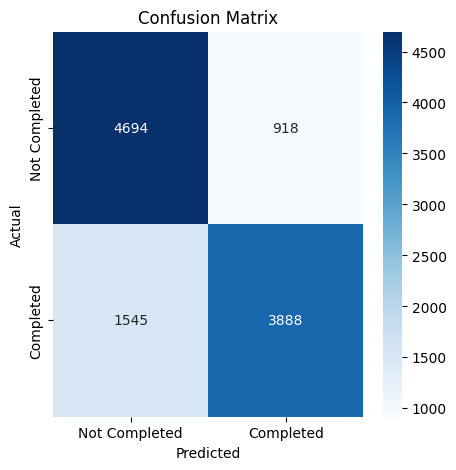

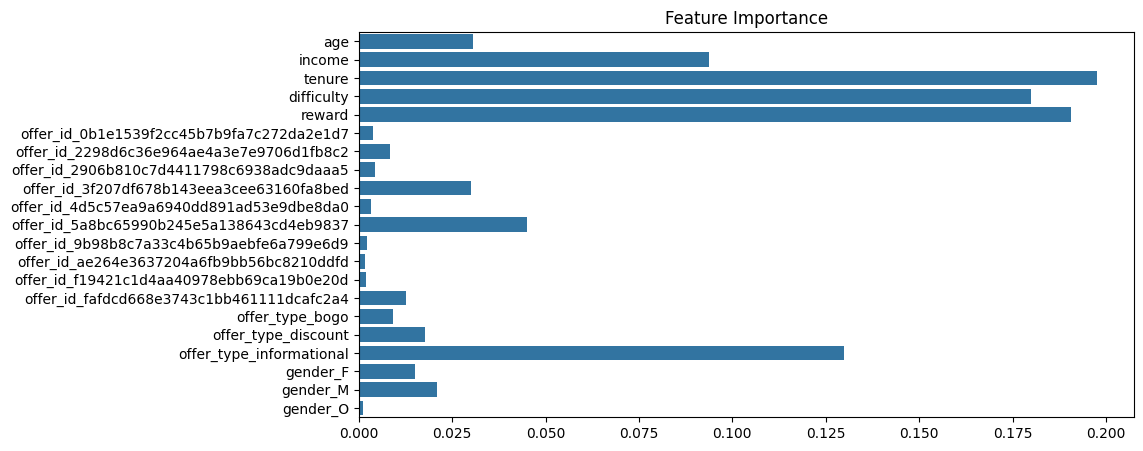

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define Features and Target
features = ['age', 'income', 'tenure', 'offer_id', 'offer_type', 'gender', 'difficulty', 'reward']
target = 'offer_status'

# Convert categorical features to one-hot encoding
categorical_features = ['offer_id', 'offer_type', 'gender']
numerical_features = ['age', 'income', 'tenure', 'difficulty', 'reward']

# Create Preprocessing Steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Define Model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(transcript[features], transcript[target], test_size=0.2, random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform Grid Search with 4-Fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on Test Set with Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
model = best_model.named_steps['classifier']
feature_names = numerical_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
importances = model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


The model results show an overall balanced classification performance for predicting offer completion. The confusion matrix indicates that the model correctly classified most cases, but there are still some misclassifications. Specifically, out of 11,045 samples, 4,694 "Not Completed" offers were correctly predicted, while 918 were misclassified as "Completed." Similarly, 3,888 "Completed" offers were correctly predicted, while 1,545 were misclassified. The classification report highlights that the model achieved an overall accuracy of 78%, with a precision of 75% and recall of 84% for completed offers, meaning the model identifies completed offers effectively but sometimes incorrectly classifies them.

The model results show an overall balanced classification performance for predicting offer completion. The confusion matrix indicates that the model correctly classified most cases, but there are still some misclassifications. Specifically, out of 11,045 samples, 4,694 "Not Completed" offers were correctly predicted, while 918 were misclassified as "Completed." Similarly, 3,888 "Completed" offers were correctly predicted, while 1,545 were misclassified. The classification report highlights that the model achieved an overall accuracy of 78%, with a precision of 75% and recall of 84% for completed offers, meaning the model identifies completed offers effectively but sometimes incorrectly classifies them.

# Conclusion  

Starbucks' personalized rewards program is designed to enhance customer engagement through targeted promotional offers. However, not all offers lead to completion, making it critical to identify the factors that drive customer response. The primary goal of this project was to analyze customer behavior, determine the key drivers of offer completion, and build a predictive model to help Starbucks optimize its marketing strategies. By leveraging data-driven insights, Starbucks can refine its promotional efforts, allocate resources effectively, and enhance customer loyalty.  

## Key Findings and Insights  

Our analysis revealed several important trends regarding customer engagement with promotional offers:  

1. **Spending and Transaction Behavior**  
   - Customers with higher income levels generally spend more and have larger transaction amounts.  
   - The **40-60** and **60+** age groups, particularly those with high or very high incomes, exhibited the highest total spending and transaction amounts, indicating strong engagement with Starbucks.  

2. **Offer Completion Rate**  
   - **Older and higher-income customers are more likely to complete offers** than younger or lower-income customers.  
   - The **60+** age group had the highest offer completion rates, while customers under **25** had the lowest.  
   - Within each age category, **higher income levels corresponded with higher completion rates**, suggesting that wealthier individuals are more responsive to promotional incentives.  

3. **Influential Factors in Offer Completion**  
   - The **most important factors in offer completion** were **income, tenure, offer difficulty, reward amount, and offer type**.  
   - Offer types played a **significant role**, with **informational offers showing the highest influence** in predicting completion likelihood.  
   - The **preferred communication channels varied across demographics**, meaning targeted messaging could improve response rates.  

4. **Gaps in Data and Customer Segments**  
   - Some high-income segments, particularly **Very High income under 25 and 25-40**, had missing transaction data, possibly indicating fewer customers in these categories or lower engagement.  
   - **Lower-income customers had lower offer completion rates**, suggesting they may need more attractive or personalized incentives.  

## Recommendations to Increase Offer Completions  

1. **Targeting Older, High-Spending Customers**  
   - Given that **older, wealthier customers have the highest completion rates**, Starbucks should continue investing in offers tailored to this demographic, such as **premium rewards, exclusive deals, and loyalty-based incentives**.  

2. **Improving Engagement Among Younger and Lower-Income Customers**  
   - Younger customers under **25 years old** had the lowest offer completion rates, so **simpler, high-value incentives like easy-to-redeem discounts or freebies** could increase engagement.  
   - Lower-income customers across all age groups had **lower transaction amounts and completion rates**, meaning Starbucks may need to **offer smaller, more frequent rewards** to encourage engagement.  

3. **Refining Offer Structures Based on Customer Segmentation**  
   - Since offer **difficulty and reward amount significantly impact completion**, Starbucks should **personalize these attributes based on customer spending habits**.  
   - **High-income, long-tenure customers** can receive more complex, high-value offers, while **new or lower-income customers** should get **easier-to-complete promotions**.  

4. **Optimizing Communication Strategies**  
   - Starbucks should **leverage data-driven insights to match the right communication channels to each customer group** (e.g., web, mobile, email, or social media).  
   - Customers who view but do not complete offers should receive **personalized reminders, deadline extensions, or additional incentives**.  

## Future Recommendations for Model Improvement and Testing  

1. **A/B Testing for Offer Optimization**  
   - Starbucks can conduct **A/B tests on offer structures, reward levels, and communication channels** to determine the most effective engagement strategies.  
   - By segmenting customers into test and control groups, Starbucks can **validate which tactics lead to the highest offer completion rates**.  

2. **Incorporating Additional Features for Model Enhancement**  
   - Future models should consider **real-time transaction patterns, customer app interactions, seasonal trends, and product preferences** to improve predictive performance.  

3. **Developing Segmented Machine Learning Models**  
   - Instead of a single model, Starbucks can **train separate models for different customer groups** (e.g., new vs. loyal customers, budget-conscious vs. high-spending customers) to **improve targeting and personalization**.  

4. **Testing Advanced Machine Learning Models**  
   - While the Random Forest model performed well, Starbucks could explore **XGBoost, LightGBM, or deep learning techniques** to better capture complex interactions between features.  

## Final Thoughts  

This project successfully demonstrated how Starbucks can use data-driven insights to **predict offer completion, optimize marketing efforts, and enhance customer experiences**. Our findings show that **income, tenure, difficulty, reward, and offer types are crucial in predicting completion rates**, and targeted strategies can significantly improve engagement. By implementing **personalized incentives, optimizing communication channels, and refining offer structures**, Starbucks can increase offer completions and drive higher customer loyalty.  

Moving forward, **continuous A/B testing, customer segmentation, and incorporating real-time behavioral data** will further improve marketing efficiency and ensure that Starbucks’ rewards program remains effective in engaging customers.